In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import pylab

In [2]:
# sample from a bivariate gaussian through gibbs sampler
from scipy.stats import multivariate_normal

In [3]:
x1 = np.linspace(-10, +10, 1000)
x2 = np.linspace(-10, +10, 1000)
# rho known
rho = 0.8
# y observed
y1, y2 = (0,0)
# theta unknown
theta1, theta2 = (0,0)

In [8]:
def theta_given_y(y1,y2): return multivariate_normal(mean = [y1,y2],cov = [[1, rho], [rho, 1]])
def theta1_given_theta2_y(theta2, y1, y2): return stats.norm(y1 + rho*(theta2 - y2), np.sqrt(1 - rho**2))
def theta2_given_theta1_y(theta1,y1, y2): return stats.norm(y2 + rho*(theta1 - y1), np.sqrt(1 - rho**2))

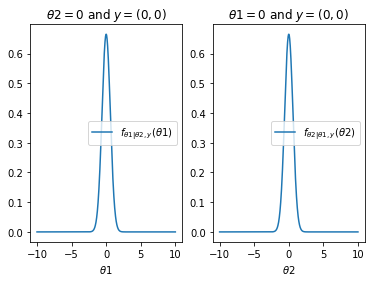

In [5]:
plt.figure(1) 

plt.subplot(121) 
plt.title(r'$\theta2 = 0$ and $y=(0,0)$')
plt.plot(x1, theta1_given_theta2_y(theta2, y1, y2).pdf(x1), label = r'$f_{\theta1 | \theta2,y}(\theta1)$')
plt.xlabel(r'$\theta1$')
plt.legend()

plt.subplot(122) 
plt.title(r'$\theta1 = 0$ and $y=(0,0)$')
plt.plot(x2, theta2_given_theta1_y(theta1, y1, y2).pdf(x2), label = r'$f_{\theta2 | \theta1,y}(\theta2)$')
plt.xlabel(r'$\theta2$')
plt.legend()

plt.show()

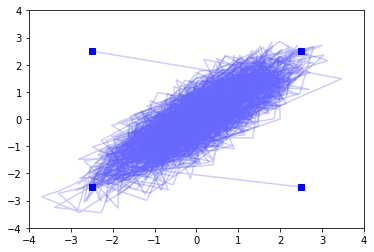

In [9]:
starting_points = [(-2.5, -2.5),(+2.5, -2.5),(-2.5, +2.5),(+2.5, +2.5)]

plt.figure(1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)


for theta1_est, theta2_est in starting_points:


    plt.plot(theta1_est, theta2_est,'bs')    
    vec_theta1 = [theta1_est]
    vec_theta2 = [theta2_est]

    for i in range(1000):
        theta1_est = theta1_given_theta2_y(theta2_est, y1, y2).rvs(size=1)[0]
        theta2_est = theta2_given_theta1_y(theta1_est, y1, y2).rvs(size=1)[0]
        vec_theta1.append(theta1_est)
        vec_theta2.append(theta2_est)
        
    plt.plot(vec_theta1, vec_theta2, 'b', alpha = 0.2)
   
plt.show() 